In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [26]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [28]:
df.duplicated().sum()

0

In [30]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
• Exploration Summary

• we have a dataframe consisting of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be casted into date time and to extract only the year value.
• Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
• there is noticable outliers in Popularity column
• Vote_Average better be categorized for proper analysis.
• Genre column has comma saperated values and white spaces that needs to be handled and casted into category. Exploration Summary

In [38]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [40]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [42]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [48]:
cols = ['Overview', 'Original_Langauge', 'Poster_Url']

In [26]:
cols = ['Overview', 'Original_Language', 'Poster_Url']  # Correct spelling
df.drop(cols, axis=1, inplace=True)


In [28]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [30]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


**catigorizing `Vote_Average` column**

We would cut the `Vote_Average` values and make 4 categories: `popular` `average` `below_avg` `not_popular` to describe it more using `catigorize_col()` for provided above.

In [37]:
def catigorize_col(df, col, labels):
    # Work on a copy of the column
    col_data = df[col].copy()

    # Ensure it's numeric before describing
    if not pd.api.types.is_numeric_dtype(col_data):
        print(f"Warning: Column '{col}' is not numeric. Attempting to convert.")
        col_data = pd.to_numeric(col_data, errors='coerce')
        # Handle NaNs if conversion creates them
        col_data.dropna(inplace=True) # Or fill with mean/median etc.

    # If after conversion there's no data, handle it
    if col_data.empty:
        print(f"Error: No numeric data left in '{col}' after conversion/dropna. Cannot categorize.")
        return df # Return original df or raise error

    edges = [col_data.describe()['min'],
             col_data.describe()['25%'],
             col_data.describe()['50%'],
             col_data.describe()['75%'],
             col_data.describe()['max']]

    # Check for non-finite values in edges (e.g., if column was all NaN)
    if any(pd.isna(e) for e in edges):
        print(f"Error: Edges contain non-finite values for column '{col}'. Cannot categorize.")
        return df

    # Use the modified qcut logic for robustness
    try:
        df[col] = pd.qcut(df[col], q=len(labels), labels=labels, duplicates='drop')
    except ValueError as e:
        print(f"Warning: Could not create exactly {len(labels)} quantiles for '{col}'. Error: {e}")
        # ... (rest of the qcut fallback logic from previous answer) ...
        temp_bins = pd.qcut(df[col], q=len(labels), labels=False, duplicates='drop')
        num_actual_bins = len(temp_bins.unique())
        if num_actual_bins < len(labels):
            labels_to_use = labels[:num_actual_bins]
            df[col] = temp_bins.map(dict(enumerate(labels_to_use)))
            print(f"Assigned {num_actual_bins} labels: {labels_to_use}")
        else:
            df[col] = temp_bins

    return df

In [40]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [62]:
import pandas as pd

# --- Assuming 'df' is your DataFrame and 'Release_Date' column already contains years ---
# If you haven't run the previous code to transform 'Release_Date' to years yet,
# please make sure to run it first:
# df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
# df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year.astype('Int64')


# Step 1: Get a list of all current column names
cols = df.columns.tolist()

# Step 2: Remove 'Release_Date' from its current position in the list
# We use .remove() to delete the first occurrence of 'Release_Date'.
cols.remove('Release_Date')

# Step 3: Insert 'Release_Date' at the beginning of the list (index 0)
cols.insert(0, 'Release_Date')

# Step 4: Reindex the DataFrame with the new column order
df = df[cols]

# Display the updated DataFrame to see the reordered columns
print("DataFrame with 'Release_Date' in the first position:")
print(df.head())

# You can also print all column names to verify the order
print("\nNew column order:")
print(df.columns.tolist())

DataFrame with 'Release_Date' in the first position:
   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          1970  Spider-Man: No Way Home    5083.954        8940      popular   
1          1970               The Batman    3827.658        1151      popular   
2          1970                  No Exit    2618.087         122    below_avg   
3          1970                  Encanto    2402.201        5076      popular   
4          1970           The King's Man    1895.511        1793      average   

                                Genre  Release_Year  
0  Action, Adventure, Science Fiction          2021  
1            Crime, Mystery, Thriller          2022  
2                            Thriller          2022  
3  Animation, Comedy, Family, Fantasy          2021  
4    Action, Adventure, Thriller, War          2021  

New column order:
['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre', 'Release_Year']


In [64]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,1970,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,1970,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,1970,No Exit,2618.087,122,below_avg,Thriller,2022
3,1970,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,1970,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [66]:
import pandas as pd

# --- Assuming 'df' is your DataFrame ---
# (Make sure 'df' is loaded and the 'Release_Date' column exists)

# Remove the 'Release_Date' column
# axis=1 specifies that we are dropping a column
# inplace=True modifies the DataFrame directly, so you don't need df = df.drop(...)
df.drop('Release_Date', axis=1, inplace=True)

# Display the updated DataFrame to confirm the column is removed
print("DataFrame after removing 'Release_Date' column:")
print(df.head())

# You can also check the list of columns to verify
print("\nRemaining columns:")
print(df.columns.tolist())

DataFrame after removing 'Release_Date' column:
                     Title  Popularity  Vote_Count Vote_Average  \
0  Spider-Man: No Way Home    5083.954        8940      popular   
1               The Batman    3827.658        1151      popular   
2                  No Exit    2618.087         122    below_avg   
3                  Encanto    2402.201        5076      popular   
4           The King's Man    1895.511        1793      average   

                                Genre  Release_Year  
0  Action, Adventure, Science Fiction          2021  
1            Crime, Mystery, Thriller          2022  
2                            Thriller          2022  
3  Animation, Comedy, Family, Fantasy          2021  
4    Action, Adventure, Thriller, War          2021  

Remaining columns:
['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre', 'Release_Year']


In [68]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,below_avg,Thriller,2022
3,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [70]:
import pandas as pd

# --- Assuming 'df' is your DataFrame ---
# Ensure 'df' is loaded, and 'Release_Date' column contains the years
# If you dropped 'Release_Date' previously, you might need to reload your data
# and re-run the year extraction step.
# For example:
# df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
# df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year.astype('Int64')


# Check if 'Release_Date' column exists and rename it if it does
if 'Release_Date' in df.columns:
    df.rename(columns={'Release_Date': 'Release_Year'}, inplace=True)
    print("Renamed 'Release_Date' to 'Release_Year'.")
elif 'Release_Year' not in df.columns:
    print("Error: 'Release_Year' column does not exist. Please ensure you have extracted years and named the column correctly.")
    print("Current columns:", df.columns.tolist())
    # You might need to reload your data and re-extract the year if it was dropped.
    # Example if you need to recreate 'Release_Year' from original 'Release_Date' column:
    # df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
    # df['Release_Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year.astype('Int64')
    # df.drop('Release_Date', axis=1, inplace=True) # Drop original Release_Date if you don't want it


# --- Now, reorder the columns as requested ---
desired_order = ['Release_Year', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre']

# Ensure all desired columns exist in the DataFrame
# This check is important to prevent a KeyError if a column is missing
if not all(col in df.columns for col in desired_order):
    missing_cols = [col for col in desired_order if col not in df.columns]
    print(f"Error: The following columns are missing from the DataFrame: {missing_cols}")
    print("Current columns available:", df.columns.tolist())
else:
    df = df[desired_order]
    print("\nColumns reordered successfully:")
    print(df.head())

    print("\nNew column order:")
    print(df.columns.tolist())


Columns reordered successfully:
   Release_Year                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2022               The Batman    3827.658        1151      popular   
2          2022                  No Exit    2618.087         122    below_avg   
3          2021                  Encanto    2402.201        5076      popular   
4          2021           The King's Man    1895.511        1793      average   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War  

New column order:
['Release_Year', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre']


In [72]:
df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [74]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [76]:
df.dropna(inplace = True)

df.isna().sum()

Release_Year    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [78]:
df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


We'd split genres into list and then explode our dataframe to have one genre per row for each movie

In [90]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,nan
1,2022,The Batman,3827.658,1151,popular,nan
2,2022,No Exit,2618.087,122,below_avg,nan
3,2021,Encanto,2402.201,5076,popular,nan
4,2021,The King's Man,1895.511,1793,average,nan


In [92]:
import pandas as pd

# --- Step 0: Load your DataFrame (if not already loaded) ---
# This ensures we start with the original data for 'Release_Date'
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

# --- Step 1: Convert 'Release_Date' to Year and set its type ---
# Convert to datetime objects, extract year, and ensure it can handle potential NaNs (Int64)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year.astype('Int64')

# --- Step 2: Reorder columns to put 'Release_Date' in the first position ---
cols = df.columns.tolist()
if 'Release_Date' in cols:
    cols.remove('Release_Date')
    cols.insert(0, 'Release_Date')
    df = df[cols]
else:
    print("Warning: 'Release_Date' column not found for reordering. Please check column names.")

# --- Step 3: Explode the 'Genre' column and clean up NaNs ---
# Prepare 'Genre' by converting to string, replacing 'nan' text, and splitting into lists
df['Genre'] = df['Genre'].astype(str).apply(lambda x: [g.strip() for g in x.split(', ') if g.strip()])

# Explode the DataFrame based on the lists in the 'Genre' column
df = df.explode('Genre').reset_index(drop=True)

# Remove any rows where 'Genre' might still be NaN (e.g., if original genre was genuinely empty)
df.dropna(subset=['Genre'], inplace=True)


# --- Display the final DataFrame as in your screenshot ---
print("DataFrame transformed to the desired format:")
print(df.head())

# Optional: You can check the shape and info for verification
# print("\nDataFrame Info:")
# df.info()
# print("\nDataFrame Shape (rows, columns):", df.shape)

DataFrame transformed to the desired format:
   Release_Date                    Title  \
0          2021  Spider-Man: No Way Home   
1          2021  Spider-Man: No Way Home   
2          2021  Spider-Man: No Way Home   
3          2022               The Batman   
4          2022               The Batman   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  Peter Parker is unmasked and no longer able to...    5083.954        8940   
2  Peter Parker is unmasked and no longer able to...    5083.954        8940   
3  In his second year of fighting crime, Batman u...    3827.658        1151   
4  In his second year of fighting crime, Batman u...    3827.658        1151   

   Vote_Average Original_Language            Genre  \
0           8.3                en           Action   
1           8.3                en        Adventure   
2           8.3                en  Science Fict

In [94]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [96]:
import pandas as pd

# --- Assuming 'df' is your DataFrame in its current state ---
# (Make sure 'df' is loaded and the 'Poster_Url' column exists)

# Remove the 'Poster_Url' column
# axis=1 specifies that we are dropping a column
# inplace=True modifies the DataFrame directly
if 'Poster_Url' in df.columns:
    df.drop('Poster_Url', axis=1, inplace=True)
    print("Removed 'Poster_Url' column successfully.")
else:
    print("Warning: 'Poster_Url' column not found in the DataFrame. No column was removed.")

# Display the first few rows to confirm the column is gone
print("\nDataFrame after removing 'Poster_Url' column:")
print(df.head())

# You can also check the list of columns to verify
print("\nRemaining columns:")
print(df.columns.tolist())

Removed 'Poster_Url' column successfully.

DataFrame after removing 'Poster_Url' column:
   Release_Date                    Title  \
0          2021  Spider-Man: No Way Home   
1          2021  Spider-Man: No Way Home   
2          2021  Spider-Man: No Way Home   
3          2022               The Batman   
4          2022               The Batman   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  Peter Parker is unmasked and no longer able to...    5083.954        8940   
2  Peter Parker is unmasked and no longer able to...    5083.954        8940   
3  In his second year of fighting crime, Batman u...    3827.658        1151   
4  In his second year of fighting crime, Batman u...    3827.658        1151   

   Vote_Average Original_Language            Genre  
0           8.3                en           Action  
1           8.3                en        Adventure  
2     

In [98]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery


In [100]:
df.drop('Overview', axis=1, inplace=True)



In [102]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,en,Crime
4,2022,The Batman,3827.658,1151,8.1,en,Mystery


In [110]:
df.drop('Original_Language', axis=1, inplace=True)

In [112]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [114]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  Int64   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  float64 
 5   Genre         25793 non-null  category
dtypes: Int64(1), category(1), float64(2), int64(1), object(1)
memory usage: 1.0+ MB


In [120]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average      74
Genre             19
dtype: int64

In [122]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


# Data Visualization

In [125]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix ?

In [128]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

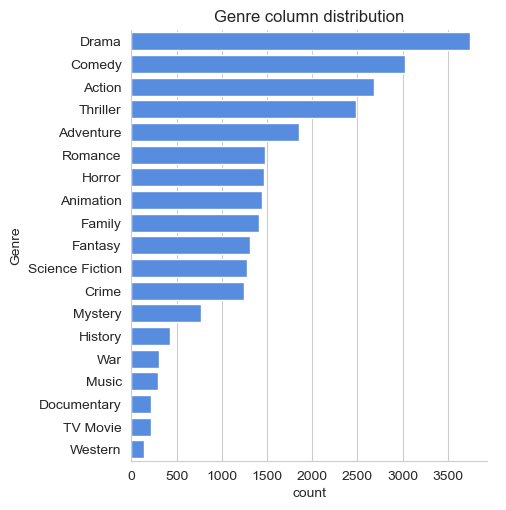

In [130]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = '#4287f5')

plt.title('Genre column distribution')
plt.show()

# What movie got the highest popularity? what's its genre?


In [138]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure


In [140]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


# What movie got the lowest popularity? what's its genre?


In [143]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25790,1984,Threads,13.354,186,7.8,War
25791,1984,Threads,13.354,186,7.8,Drama
25792,1984,Threads,13.354,186,7.8,Science Fiction


# Which year has the most filmmed movies?


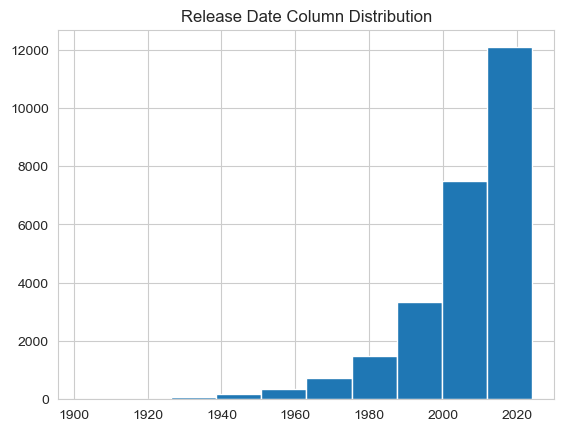

In [146]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()